Saving 1. Predict Loan Default (1).csv to 1. Predict Loan Default (1) (1).csv
Accuracy: 0.886273741922851
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.67      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



<ipython-input-5-d70c491b0012>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


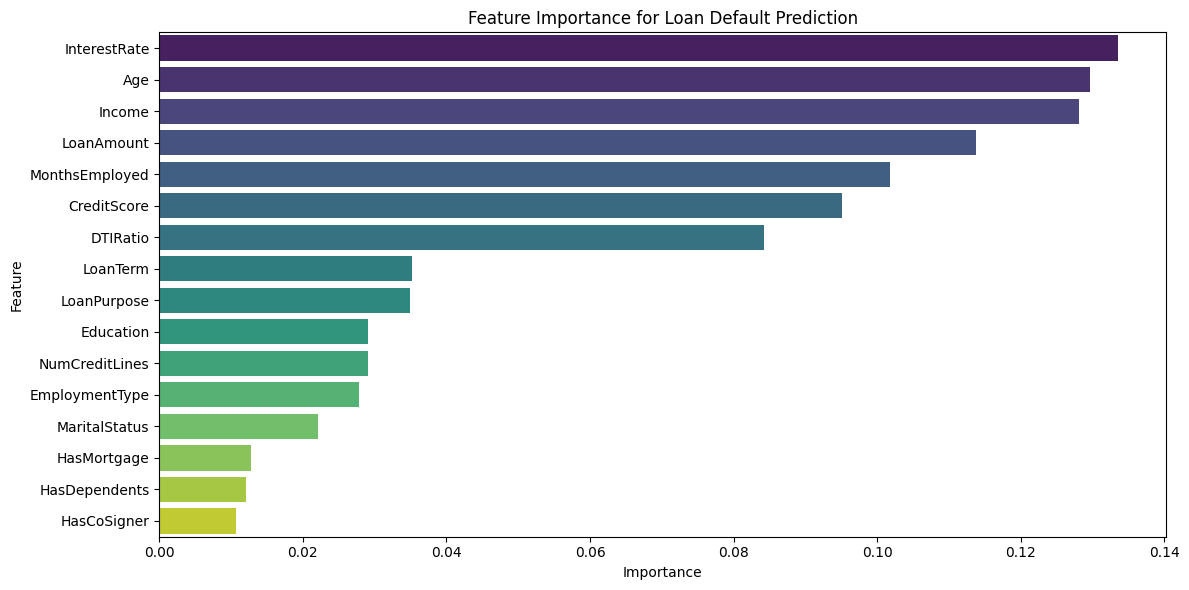

In [5]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 3: Load the CSV file (update the name if different)
df = pd.read_csv("1. Predict Loan Default (1).csv")

# Step 4: Drop non-informative columns
if "LoanID" in df.columns:
    df = df.drop(columns=["LoanID"])

# Step 5: Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 6: Split the data
X = df.drop(columns=["Default"])
y = df["Default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest model with class_weight to handle imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 9: Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Step 10: Plot Feature Importance
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importance for Loan Default Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
